# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

In [1]:
# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
from datafromsource import DataFromSource

In [2]:
aapl = DataFromSource('AAPL.O')
df = aapl.get_prices()
df

An error occurred while requesting URL('http://localhost:9000/api/status').
	ConnectError('[WinError 10061] No connection could be made because the target machine actively refused it')
An error occurred while requesting URL('http://localhost:9000/api/status').
	ConnectError('[WinError 10061] No connection could be made because the target machine actively refused it')
An error occurred while requesting URL('http://localhost:9060/api/status').
	ConnectError('[WinError 10061] No connection could be made because the target machine actively refused it')
Error: no proxy address identified.
Check if Desktop is running.
An error occurred while requesting URL('http://localhost:9000/api/handshake').
	ConnectError('[WinError 10061] No connection could be made because the target machine actively refused it')
Error on handshake url http://localhost:9000/api/handshake : ConnectError('[WinError 10061] No connection could be made because the target machine actively refused it')
Session is not opened. 

Error retrieving data for AAPL.O: Session is not opened. Can't send any request


In [3]:
%pip install TA-Lib
## https://ta-lib.github.io/ta-lib-python/

Note: you may need to restart the kernel to use updated packages.


In [4]:
import talib as ta
import matplotlib.pyplot as plt
import numpy as np

In [5]:
for t in [5, 21, 63]:
    print(t)

5
21
63


In [6]:
for t in [5, 21, 63]:
    df[f'SMA_{t}'] = ta.SMA(df['close'],
                               timeperiod=t)

In [7]:
df

AAPL.O,close,SMA_5,SMA_21,SMA_63
Date,,,,
2024-08-23,226.84,NaN,NaN,NaN
2024-08-26,227.18,NaN,NaN,NaN
2024-08-27,228.03,NaN,NaN,NaN
2024-08-28,226.49,NaN,NaN,NaN
2024-08-29,229.79,227.666,NaN,NaN
...,...,...,...,...
2025-08-18,230.89,231.648,217.490952,208.473175
2025-08-19,230.56,231.830,218.351905,208.818889
2025-08-20,226.01,230.366,218.904762,209.122857


In [8]:
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'svg'

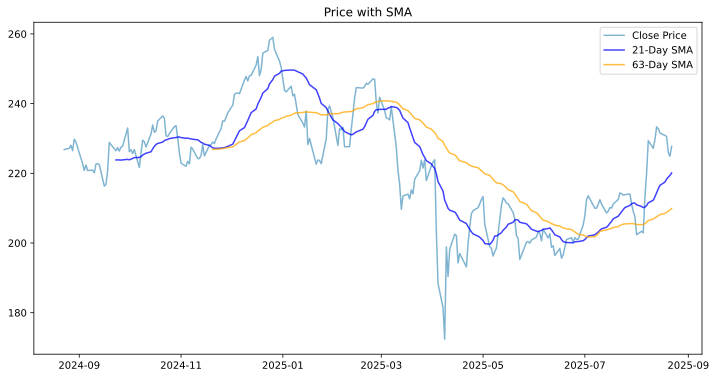

In [9]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

plt.title('Price with SMA')
plt.legend()
plt.show()

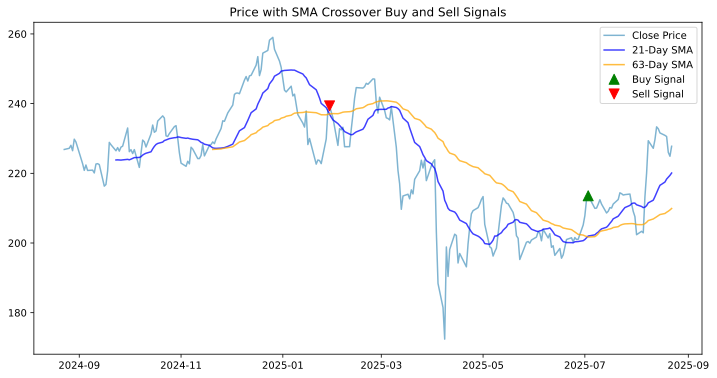

In [10]:
# Generate Buy and Sell signals
df['Buy_Signal'] = np.where((df['SMA_21'] > df['SMA_63']) & (df['SMA_21'].shift(1) <= df['SMA_63'].shift(1)), 1, 0)
df['Sell_Signal'] = np.where((df['SMA_21'] < df['SMA_63']) & (df['SMA_21'].shift(1) >= df['SMA_63'].shift(1)), -1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

# Plot Buy Signals
plt.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell Signals
plt.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Price with SMA Crossover Buy and Sell Signals')
plt.legend()
plt.show()

In [11]:
df['position'] = np.where((df['SMA_21'] > df['SMA_63']),  
                             1,  
                             -1) 

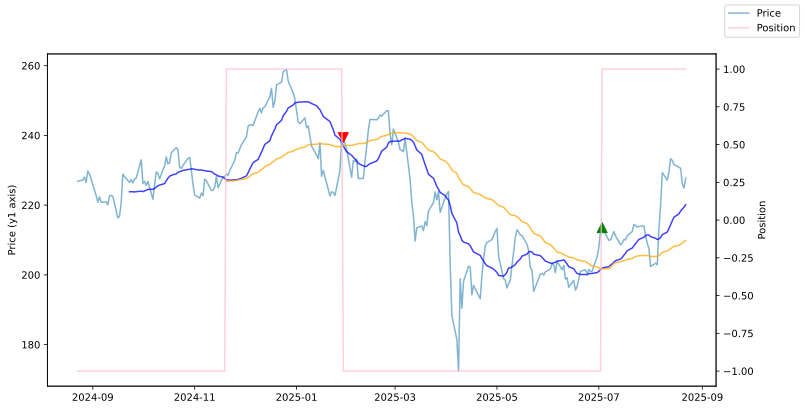

In [12]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator


fig,ax1 = plt.subplots(figsize=(12, 6))
l1, = ax1.plot(df.index, df['close'], label='Close Price', alpha=0.5) #Your Price field
ax1.set_ylabel('Price (y1 axis)')
ax1.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
ax1.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')
ax1.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
ax1.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

In [13]:
df['Returns'] = np.log(df['close'] / df['close'].shift(1))
df['Strategy'] = df['position'].shift(1) * df['Returns']  
df.round(4).head()
df = df.dropna(how='all')

In [14]:
df.dropna(inplace=True)


In [15]:
np.exp(df[['Returns', 'Strategy']].sum())  


AAPL.O
Returns     0.997722
Strategy    1.245599
dtype: float64

In [16]:
df[['Returns', 'Strategy']].std() * 252 ** 0.5


AAPL.O
Returns     0.349074
Strategy    0.348578
dtype: float64

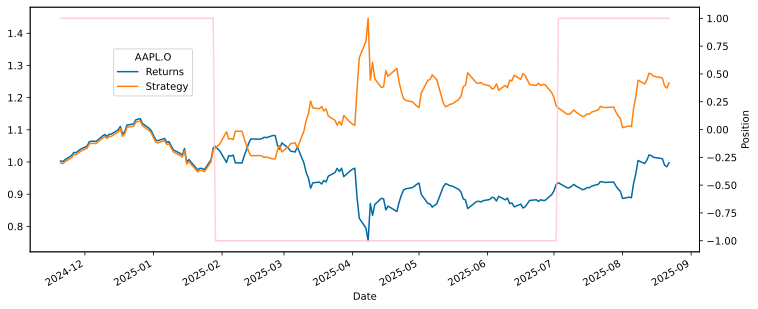

In [17]:
ax1 = df[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(12,5))

ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax1.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

### Bibliography

Vahid. Using Pandas_TA To Generate Technical Indicators And Signals https://pythonology.eu/using-pandas_ta-to-generate-technical-indicators-and-signals/

Stefan Jansen. Machine learning for trading https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/24_alpha_factor_library/02_common_alpha_factors.ipynb

Ives Hilpisch. Python for Finance https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch15/15_trading_strategies_a.ipynb

Forecast Stock Price using RDP Historical Pricing with Facebook Prophet library https://github.com/LSEG-API-Samples/Article.RDPAPI.Python.PriceForcastUsingFBProPhet/blob/main/rdp_fbprophet.ipynb